# EHR Analysis Python Data Analysis

Hello, I'm **`Ademola Abraham`**, A **`Health Data Analyst`** who will be working on a real world Dataset called **`Electronic Health Record(EHR) Dataset`**, which is in the CSV format and was gotten from [data.mendeley.com](https://data.mendeley.com/datasets/7kv3rctx7m/1).

I will be using Python data analysis libaries to analyse, clean and transform the dataset in preparation for machine learning techinqiue to make a predictive model.

# Data Description
The dataset is Electronic Health Record predicting collected from a privatee Hospital in Indonesia. it contains the patients laboratory test results used to determine next patient treatment whether in care or out care patient. it has 11 columns as listed below;

- Haematocrit

- Haemoglobin
- Erythrocyte
- Leucocyte
- Thrombocyte
- MCH
- MCHC
- MCV
- Age
- Sex
- Source


## Importing Python libaries that will be used for data cleaning and machine learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model

# Data Preparation and Cleaning

In [2]:
raw_data = pd.read_csv(r'data-ori.csv')
raw_data # Loading the dataset into the jupyter notebook(work space)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


In [3]:
data = raw_data.copy() # making a copy of the original loaded dataet 
data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


In [4]:
data.columns # Checking the names of each column

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [5]:
data.shape # Checking the number of rows and columns

(4412, 11)

In [6]:
data.duplicated().sum() # Checking for duplicated rows(repeated datas) in th dataset

0

In [7]:
data.isnull().sum() # Checking for null values in the dataset

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [8]:
data.info() # Summary of the datas in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [9]:
# Changing the datatypes of these columns to the appropriate ones

data['SEX'] = data['SEX'].astype('category')
data['SOURCE'] = data['SOURCE'].astype('category')

In [10]:
data.dtypes # Datatypes of each columns

HAEMATOCRIT      float64
HAEMOGLOBINS     float64
ERYTHROCYTE      float64
LEUCOCYTE        float64
THROMBOCYTE        int64
MCH              float64
MCHC             float64
MCV              float64
AGE                int64
SEX             category
SOURCE          category
dtype: object

In [11]:
data.describe() # Statistical summary of the dataset

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


In [12]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14,7)

In [13]:
data.corr(numeric_only=True)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.973267,0.864989,-0.217218,-0.003562,0.083714,0.108098,0.054948,-0.254799
HAEMOGLOBINS,0.973267,1.000000,0.818013,-0.208583,-0.045441,0.203248,0.314159,0.105379,-0.239480
ERYTHROCYTE,0.864989,0.818013,1.000000,-0.186711,0.025879,-0.383666,-0.048313,-0.436041,-0.412858
LEUCOCYTE,-0.217218,-0.208583,-0.186711,1.000000,0.283262,-0.014840,0.003194,-0.015885,0.191987
THROMBOCYTE,-0.003562,-0.045441,0.025879,0.283262,1.000000,-0.138058,-0.198921,-0.075961,0.031064
MCH,0.083714,0.203248,-0.383666,-0.014840,-0.138058,1.000000,0.589830,0.931804,0.350166
MCHC,0.108098,0.314159,-0.048313,0.003194,-0.198921,0.589830,1.000000,0.259672,0.041741
MCV,0.054948,0.105379,-0.436041,-0.015885,-0.075961,0.931804,0.259672,1.000000,0.395380
AGE,-0.254799,-0.239480,-0.412858,0.191987,0.031064,0.350166,0.041741,0.395380,1.000000


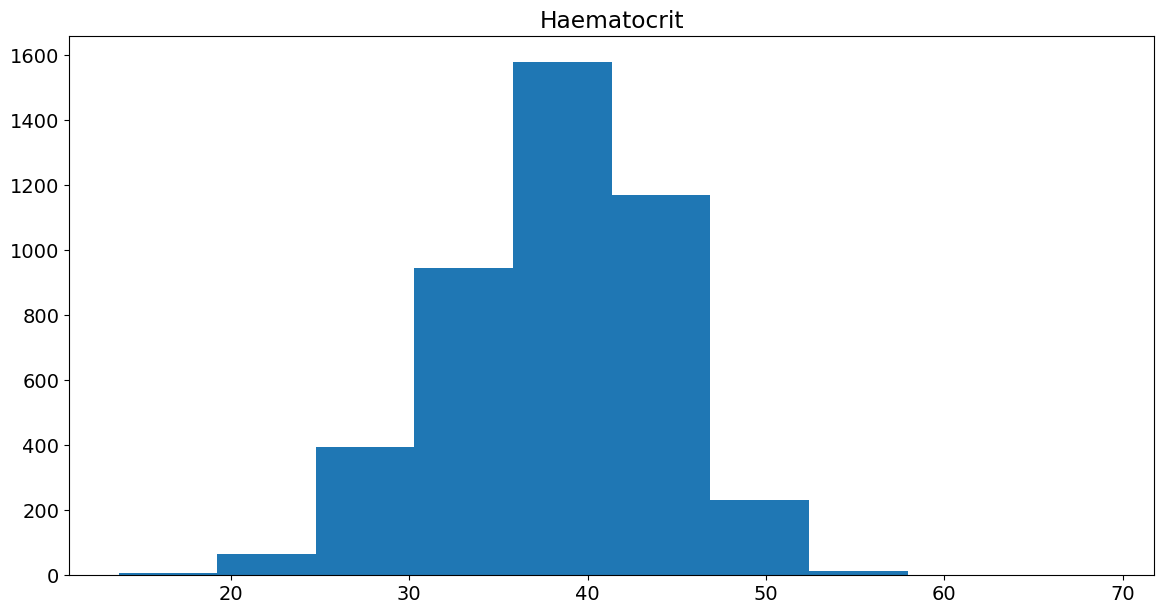

In [14]:
plt.hist(data['HAEMATOCRIT'])
plt.title('Haematocrit'); # Data distribution

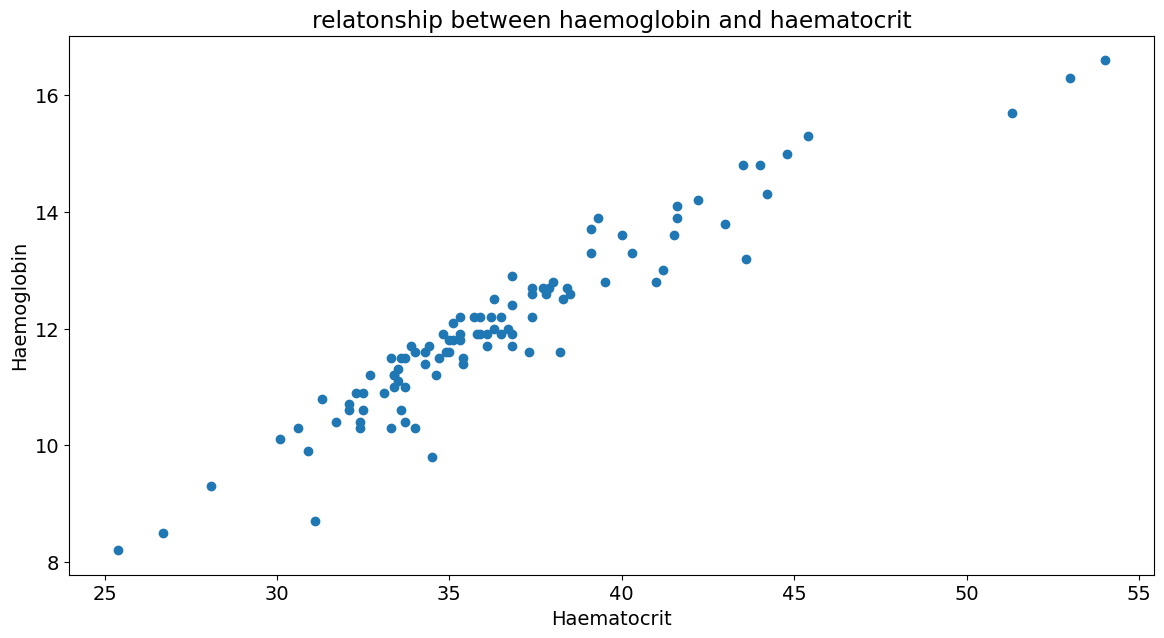

In [15]:
plt.scatter(data['HAEMATOCRIT'].head(100), data['HAEMOGLOBINS'].head(100))
plt.title('relatonship between haemoglobin and haematocrit')
plt.xlabel('Haematocrit')
plt.ylabel('Haemoglobin'); # Scatter plot

# Predictive Modeling of Hematocrit Levels from Haemoglobin Values Using Machine Learning on EHR Data

Electronic Health Records (EHR) are a valuable source of patient data that can be leveraged to improve healthcare outcomes through predictive modeling. In this project, we aim to utilize machine learning techniques to predict hematocrit levels based on haemoglobin values. Hematocrit is a crucial parameter that indicates the proportion of red blood cells in blood and is essential for diagnosing various medical conditions.

By analyzing a dataset of patient laboratory results, we develop a regression model to make accurate predictions of hematocrit levels. This model can assist healthcare providers in making informed decisions and potentially identifying patients at risk of conditions like anemia or polycythemia.

The dataset used in this project includes various blood test results collected from patients at a private hospital in Indonesia. Specifically, we focus on the relationship between haemoglobin and hematocrit, leveraging Python’s data analysis libraries to preprocess and analyze the data.

This project demonstrates the power of predictive analytics in healthcare and provides insights into the potential of machine learning to enhance medical diagnostics and patient care.


## Linear regression

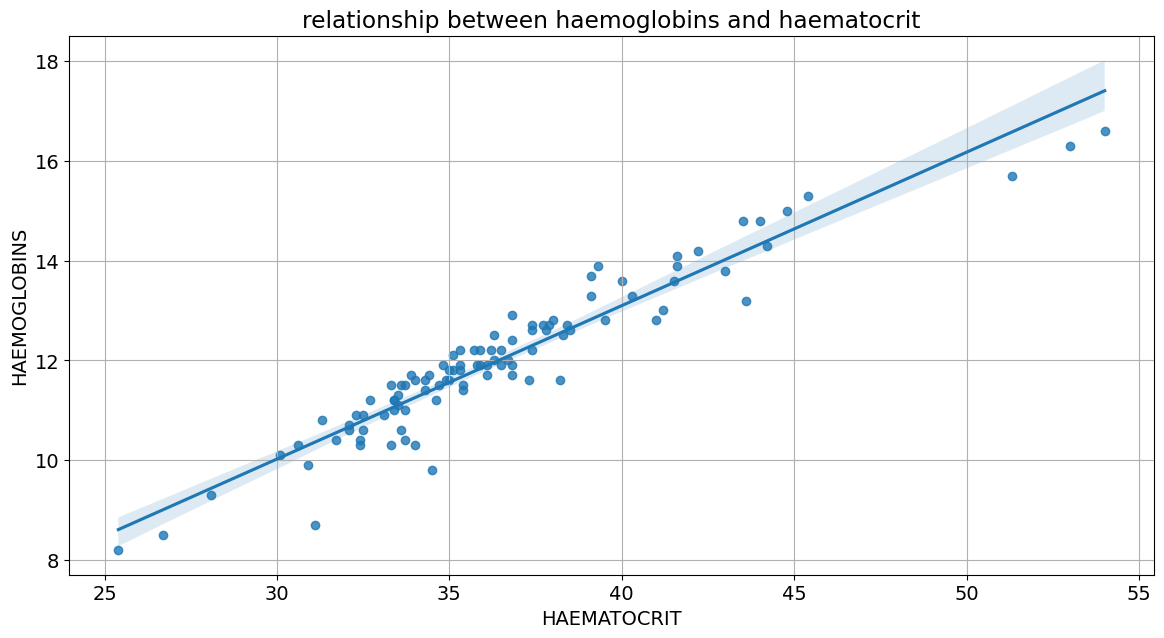

In [16]:
sns.regplot(data=data.head(100), x='HAEMATOCRIT', y='HAEMOGLOBINS')
plt.title('relationship between haemoglobins and haematocrit')
plt.grid(); # scatter plot with line of linear regression

In [17]:
stats.linregress(data['HAEMATOCRIT'].head(100), data['HAEMOGLOBINS'].head(100)) # x, y

LinregressResult(slope=0.3072392126025756, intercept=0.8088958535495436, rvalue=0.9507923721920555, pvalue=1.1392103006882374e-51, stderr=0.010113457543776705, intercept_stderr=0.3716328242353413)

In [18]:
slope, intercept, r, p, std_err = stats.linregress(data['HAEMATOCRIT'].head(100), data['HAEMOGLOBINS'].head(100)) # x, y

In [19]:
def myfunc(x):
    return slope*x+intercept # Formular for LINEAR REGRESSION (predict a future value using a single independent variable)

In [20]:
mymodel = list(map(myfunc, data['HAEMATOCRIT'].head(100)))

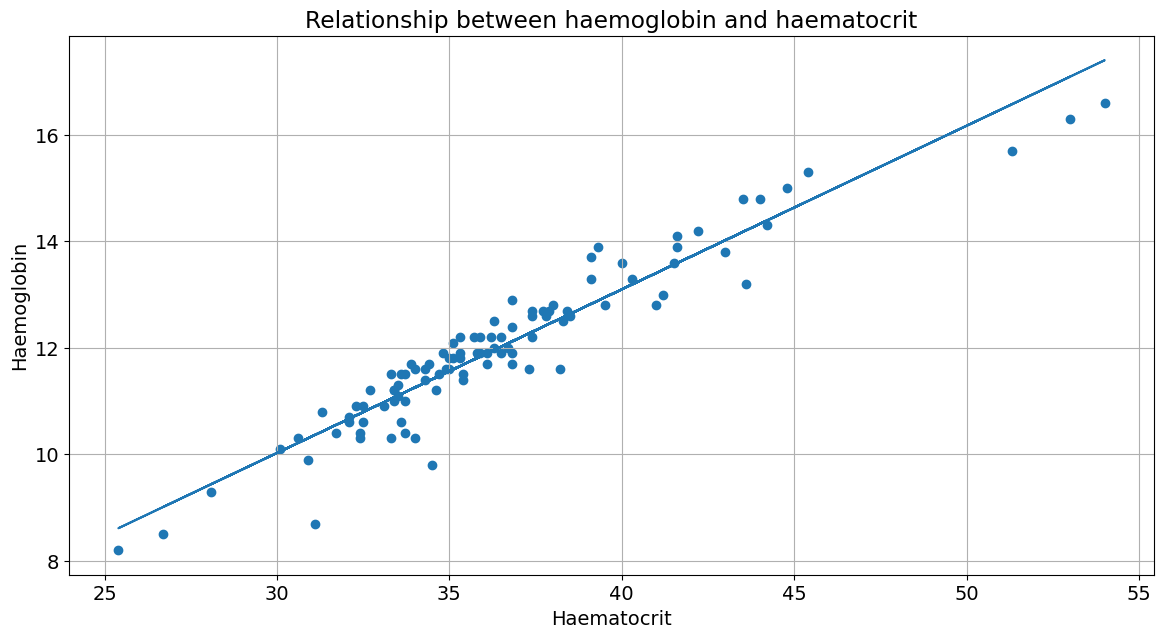

In [21]:
plt.scatter(data['HAEMATOCRIT'].head(100), data['HAEMOGLOBINS'].head(100))
plt.plot(data['HAEMATOCRIT'].head(100), mymodel)
plt.ylabel('Haemoglobin')
plt.xlabel('Haematocrit')
plt.title('Relationship between haemoglobin and haematocrit')
plt.grid();

In [22]:
# where x is always X-axis which is haematocrit here
haemoglobin_predicted=myfunc(45)
round(haemoglobin_predicted,2) # Prediction

14.63

In [23]:
def prediction_function():
    a = int(input('Haematocrit: '))
    b = round(myfunc(a),2)
    print('Predicted Haemoglobin: {}'.format(b))

In [24]:
prediction_function()

Haematocrit: 1
Predicted Haemoglobin: 1.12


### prediction 1

In [25]:
prediction_function()

Haematocrit: 57
Predicted Haemoglobin: 18.32


### prediction 2

In [26]:
prediction_function()

Haematocrit: 23
Predicted Haemoglobin: 7.88


### prediction 3

In [27]:
prediction_function()

Haematocrit: 89
Predicted Haemoglobin: 28.15


## Multiple regression

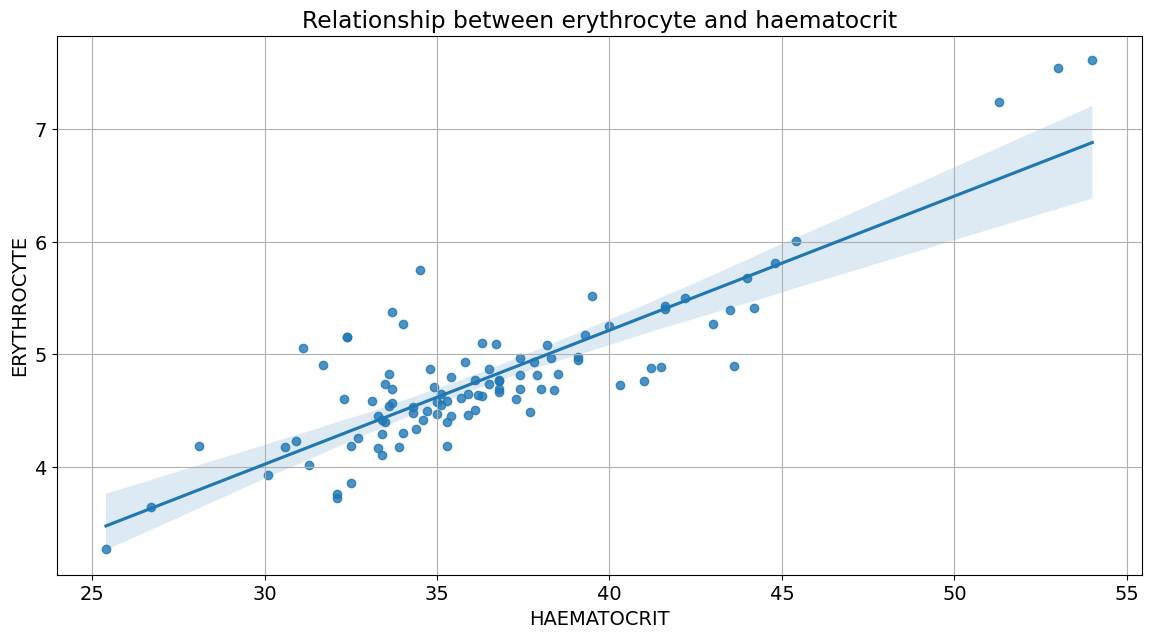

In [28]:
sns.regplot(data=data.head(100), x='HAEMATOCRIT', y='ERYTHROCYTE')
plt.title('Relationship between erythrocyte and haematocrit')
plt.grid();

In [29]:
x = np.array(data[['HAEMOGLOBINS', 'ERYTHROCYTE']])
y = np.array(data[['HAEMATOCRIT']])

In [30]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [31]:
predictedhaematocrit = regr.predict([[14.5,5.4]])
print(predictedhaematocrit) # Prediction

[[43.61539568]]


In [32]:
data.loc[1736] # Actual value

HAEMATOCRIT     44.5
HAEMOGLOBINS    14.5
ERYTHROCYTE      5.4
LEUCOCYTE       12.0
THROMBOCYTE      248
MCH             26.9
MCHC            32.6
MCV             82.4
AGE               40
SEX                M
SOURCE           out
Name: 1736, dtype: object

In [33]:
print(regr.coef_)

[[2.3068856  1.58554797]]


In [34]:
predictedhaematocrit = regr.predict([[12.7,4.88]])
print(predictedhaematocrit) # prediction

[[38.63851666]]


In [35]:
str(np.round(predictedhaematocrit,1))

'[[38.6]]'

In [36]:
data.loc[100] # actual value

HAEMATOCRIT     38.0
HAEMOGLOBINS    12.7
ERYTHROCYTE     4.88
LEUCOCYTE       11.2
THROMBOCYTE      464
MCH             26.0
MCHC            33.4
MCV             77.9
AGE                3
SEX                F
SOURCE            in
Name: 100, dtype: object

In [37]:
regr.score(x,y) # 

0.9615742057213531

has a good relationship!

In [38]:
def multiple_prediction_function():
    a = float(input('Haemoglobins: '))
    b = float(input('Erythrocyte: '))
    c = str(np.round(regr.predict([[a,b]]),2))
    print('Predicted Haematocrit: {}'.format(c[2:].replace("]]","")))

In [39]:
multiple_prediction_function()

Haemoglobins: 45
Erythrocyte: 5
Predicted Haematocrit: 113.34


### Prediction 1

In [40]:
multiple_prediction_function()

Haemoglobins: 34
Erythrocyte: 56
Predicted Haematocrit: 168.83


### Prediction 2

In [41]:
multiple_prediction_function()

Haemoglobins: 45
Erythrocyte: 56
Predicted Haematocrit: 194.2


### Prediction 3

In [42]:
multiple_prediction_function()

Haemoglobins: 5
Erythrocyte: 66
Predicted Haematocrit: 117.78
